In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# lấy dữ liệu mới cho các mã cổ phiếu đã chọn
selected_symbols = ['ACB', 'FPT', 'GAS', 'HPG', 'VCB', 'SSI']


In [3]:
!pip install vnstock


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import VNStockDataProvider, pandas và os
import sys
import pandas as pd
import os
sys.path.append(r'D:\\NCKH\\SARSA_FinancialRL\\data\\data_provider\\library_extracted\\vnstock')
from VNStockDataProvider import VNStockDataProvider

In [5]:
# Khởi tạo VNStockDataProvider
provider = VNStockDataProvider(source='VCI')

# Định nghĩa khoảng thời gian
start_date = '2015-01-01'
end_date = '2019-12-31'
interval = '1D'

In [6]:
# Lấy dữ liệu cho từng mã cổ phiếu và lưu vào biến riêng
for symbol in selected_symbols:
    print(f"Đang lấy dữ liệu cho {symbol}...")
    df = provider.get_ohlcv_data(symbol, start_date, end_date, interval, verbose=False)
    # Lưu vào biến động, ví dụ df_ACB, df_FPT, v.v.
    globals()[f'df_{symbol}'] = df
    print(f"Đã lưu dữ liệu cho {symbol} vào df_{symbol}, shape: {df.shape}")

print("Hoàn tất lấy dữ liệu cho tất cả mã!")

Đang lấy dữ liệu cho ACB...
Đã lưu dữ liệu cho ACB vào df_ACB, shape: (1306, 7)
Đang lấy dữ liệu cho FPT...
Đã lưu dữ liệu cho FPT vào df_FPT, shape: (1306, 7)
Đang lấy dữ liệu cho GAS...
Đã lưu dữ liệu cho GAS vào df_GAS, shape: (1306, 7)
Đang lấy dữ liệu cho HPG...
Đã lưu dữ liệu cho HPG vào df_HPG, shape: (1306, 7)
Đang lấy dữ liệu cho VCB...
Đã lưu dữ liệu cho VCB vào df_VCB, shape: (1306, 7)
Đang lấy dữ liệu cho SSI...
Đã lưu dữ liệu cho SSI vào df_SSI, shape: (1306, 7)
Hoàn tất lấy dữ liệu cho tất cả mã!


In [7]:
# Chỉnh sửa các DataFrame: đổi 'date' thành 'time', định dạng dd/mm/yyyy, bỏ 'symbol'
for symbol in selected_symbols:
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    
    # Đổi tên cột 'date' thành 'time'
    df = df.rename(columns={'date': 'time'})
    
    # Chuyển đổi định dạng ngày từ yyyy/mm/dd thành dd/mm/yyyy
    df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
    
    # Bỏ cột 'symbol'
    if 'symbol' in df.columns:
        df = df.drop(columns=['symbol'])
    
    # Cập nhật lại biến
    globals()[df_name] = df
    print(f"Đã chỉnh sửa {df_name}: shape {df.shape}, cột {df.columns.tolist()}")

print("Hoàn tất chỉnh sửa tất cả DataFrame!")

Đã chỉnh sửa df_ACB: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_FPT: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_GAS: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_HPG: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_VCB: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_SSI: shape (1306, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Hoàn tất chỉnh sửa tất cả DataFrame!


In [8]:
# Lưu mỗi DataFrame thành file CSV
import os

output_dir = r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

for symbol in selected_symbols:
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    file_path = os.path.join(output_dir, f'{symbol}_data_new2.csv')
    df.to_csv(file_path, index=False)
    print(f"Đã lưu {df_name} vào {file_path}")

print("Hoàn tất lưu tất cả file CSV!")

Đã lưu df_ACB vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\ACB_data_new2.csv
Đã lưu df_FPT vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\FPT_data_new2.csv
Đã lưu df_GAS vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\GAS_data_new2.csv
Đã lưu df_HPG vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\HPG_data_new2.csv
Đã lưu df_VCB vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\VCB_data_new2.csv
Đã lưu df_SSI vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\SSI_data_new2.csv
Hoàn tất lưu tất cả file CSV!


In [9]:
# # Tạo các biến DataFrame mới để lưu trữ các file CSV đã lưu
# import pandas as pd

# df_ACB = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\ACB_data.csv')
# df_FPT = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\FPT_data.csv')
# df_GAS = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\GAS_data.csv')
# df_HPG = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\HPG_data.csv')
# df_VCB = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\VCB_data.csv')
# df_SSI = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\SSI_data.csv')

# print("Đã tạo các biến DataFrame:")
# print(f"df_ACB: {df_ACB.shape}")
# print(f"df_FPT: {df_FPT.shape}")
# print(f"df_GAS: {df_GAS.shape}")
# print(f"df_HPG: {df_HPG.shape}")
# print(f"df_VCB: {df_VCB.shape}")
# print(f"df_SSI: {df_SSI.shape}")

In [10]:
df_ACB

,time,open,high,low,close,volume
0,14/10/2014,2.29,2.32,2.29,2.31,231600
1,15/10/2014,2.31,2.31,2.29,2.31,419645
2,16/10/2014,2.29,2.32,2.28,2.31,353992
3,17/10/2014,2.29,2.32,2.29,2.32,210289
4,20/10/2014,2.32,2.32,2.31,2.31,108468
...,...,...,...,...,...,...
1301,25/12/2019,6.58,6.61,6.52,6.61,1121331
1302,26/12/2019,6.58,6.58,6.52,6.52,893827
1303,27/12/2019,6.52,6.55,6.49,6.55,906262
1304,30/12/2019,6.55,6.61,6.52,6.55,1367912


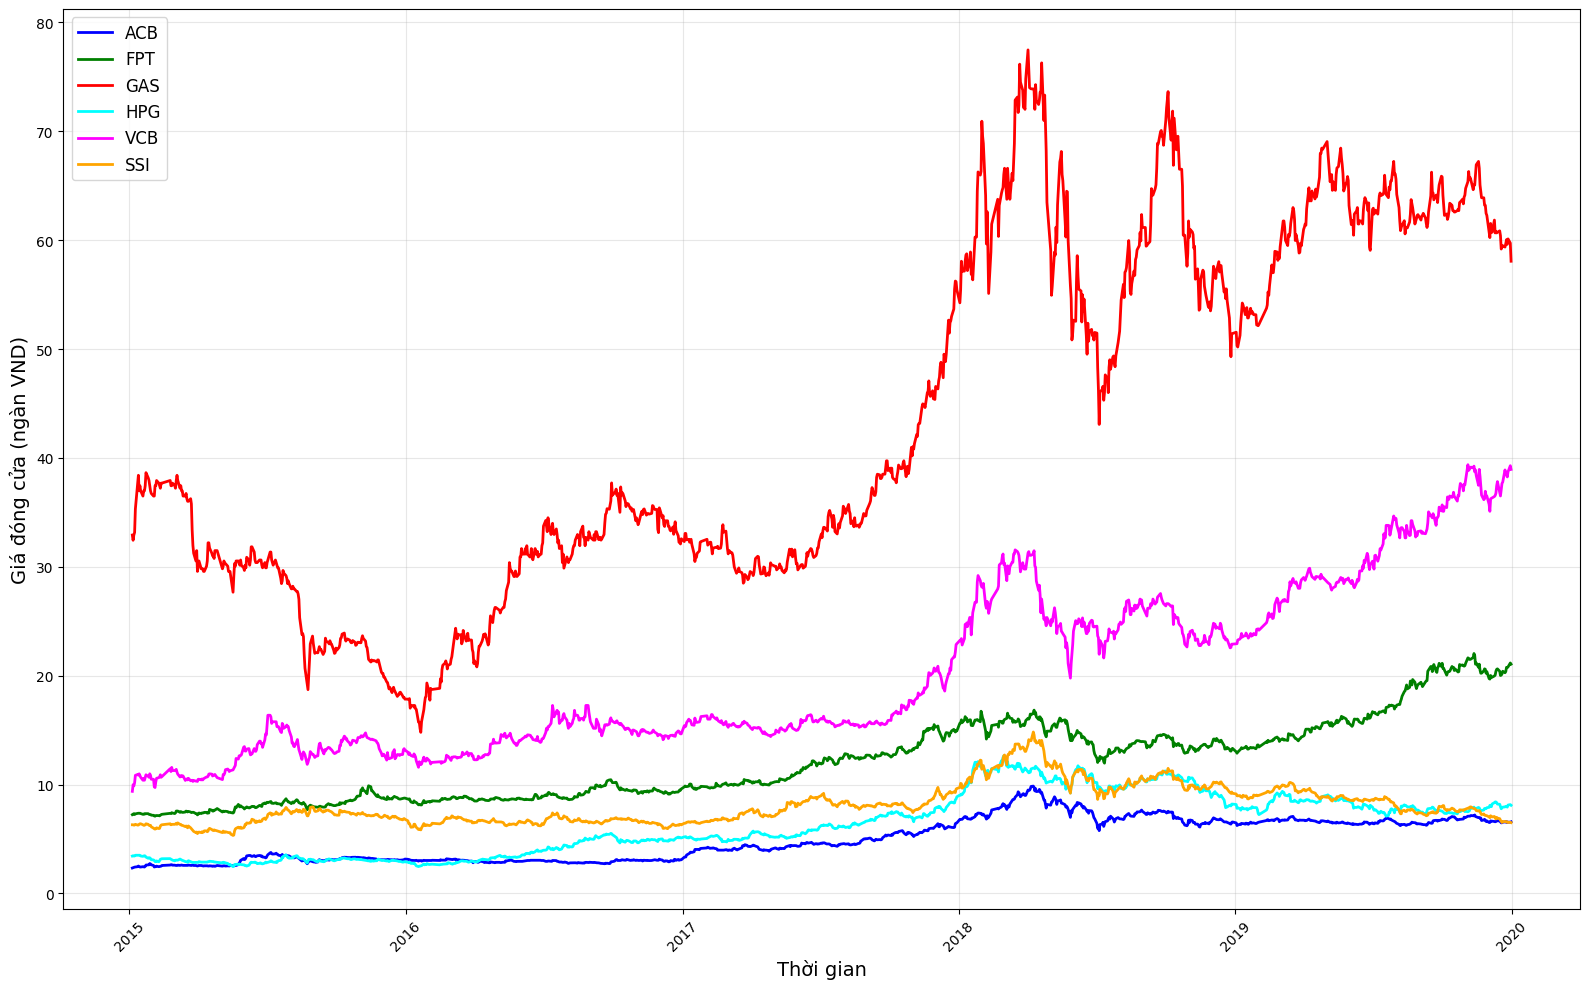

In [14]:
# Vẽ đồ thị giá cổ phiếu theo thời gian cho 6 cổ phiếu
import matplotlib.pyplot as plt
import pandas as pd

# Danh sách cổ phiếu và màu sắc
symbols = ['ACB', 'FPT', 'GAS', 'HPG', 'VCB', 'SSI']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange']

# Tạo figure
plt.figure(figsize=(16, 10))

for i, symbol in enumerate(symbols):
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    
    # Chuyển 'time' thành datetime để vẽ
    df['time_dt'] = pd.to_datetime(df['time'], format='%d/%m/%Y')
    
    # Lọc dữ liệu từ 1/1/2013 đến 31/12/2023
    df_filtered = df[(df['time_dt'] >= '01-01-2015') & (df['time_dt'] <= '31-12-2019')]
    
    # Vẽ đường giá đóng cửa
    plt.plot(df_filtered['time_dt'], df_filtered['close'], color=colors[i], label=symbol, linewidth=2)

# Thiết lập đồ thị
# plt.title('Giá cổ phiếu theo thời gian (2013-2023) - 6 cổ phiếu Việt Nam', fontsize=18, fontweight='bold')
plt.xlabel('Thời gian', fontsize=14)
plt.ylabel('Giá đóng cửa (ngàn VND)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị đồ thị
plt.show()

In [12]:
# Định nghĩa các hàm tính toán
import numpy as np

def calculate_cagr(df, price_col='close'):
    """Tính CAGR - Tỷ lệ tăng trưởng kép hàng năm"""
    # Parse time để tính số năm
    df_temp = df.copy()
    df_temp['_time'] = pd.to_datetime(df_temp['time'], format='%d/%m/%Y')
    df_temp = df_temp.sort_values('_time')
    
    start_price = df_temp[price_col].iloc[0]
    end_price = df_temp[price_col].iloc[-1]
    years = (df_temp['_time'].iloc[-1] - df_temp['_time'].iloc[0]).days / 365.25
    
    if years <= 0 or start_price <= 0:
        return np.nan
    
    cagr = (end_price / start_price) ** (1 / years) - 1
    return cagr * 100

def calculate_total_return(df, price_col='close'):
    """Tính % Tăng giá tuyệt đối"""
    start_price = df[price_col].iloc[0]
    end_price = df[price_col].iloc[-1]
    return ((end_price - start_price) / start_price) * 100 if start_price > 0 else np.nan

def calculate_max_drawdown(df, price_col='close'):
    """Tính Maximum Drawdown"""
    prices = df[price_col].values
    cummax = np.maximum.accumulate(prices)
    drawdowns = (prices - cummax) / cummax
    return drawdowns.min() * 100

def calculate_sharpe_ratio(df, price_col='close', risk_free_rate=0.03):
    """Tính Sharpe Ratio"""
    prices = df[price_col].values
    returns = np.diff(prices) / prices[:-1]
    
    if len(returns) == 0:
        return np.nan
    
    daily_rf = risk_free_rate / 252
    mean_return = returns.mean()
    std_return = returns.std()
    
    if std_return == 0:
        return np.nan
    
    sharpe = (mean_return - daily_rf) / std_return
    return sharpe * np.sqrt(252)

print("✓ Đã định nghĩa các hàm tính toán")

✓ Đã định nghĩa các hàm tính toán


In [13]:
# Tính toán các chỉ số cho từng cổ phiếu
results = []

for symbol in selected_symbols:
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    
    print(f"Đang tính toán chỉ số cho {symbol}...")
    
    # Tính các chỉ số
    cagr = calculate_cagr(df)
    total_return = calculate_total_return(df)
    max_dd = calculate_max_drawdown(df)
    sharpe = calculate_sharpe_ratio(df, risk_free_rate=0.03)
    
    # Lưu kết quả
    results.append({
        'Mã CP': symbol,
        'CAGR (%)': f"{cagr:.2f}%" if not pd.isna(cagr) else "N/A",
        '% Tăng giá tuyệt đối': f"{total_return:.2f}%" if not pd.isna(total_return) else "N/A",
        'Maximum Drawdown (%)': f"{max_dd:.2f}%" if not pd.isna(max_dd) else "N/A",
        'Sharpe Ratio': f"{sharpe:.2f}" if not pd.isna(sharpe) else "N/A"
    })
    
    # In kết quả (sửa cú pháp f-string)
    print(f"  ✓ CAGR: {f'{cagr:.2f}' if not pd.isna(cagr) else 'N/A'}%")
    print(f"  ✓ Total Return: {f'{total_return:.2f}' if not pd.isna(total_return) else 'N/A'}%")
    print(f"  ✓ Max Drawdown: {f'{max_dd:.2f}' if not pd.isna(max_dd) else 'N/A'}%")
    print(f"  ✓ Sharpe: {f'{sharpe:.2f}' if not pd.isna(sharpe) else 'N/A'}")

# Tạo DataFrame kết quả
df_analysis = pd.DataFrame(results)

print("\n" + "="*80)
print("✓ Hoàn tất tính toán cho tất cả cổ phiếu!")
print("="*80)

Đang tính toán chỉ số cho ACB...
  ✓ CAGR: 22.24%
  ✓ Total Return: 184.85%
  ✓ Max Drawdown: -41.48%
  ✓ Sharpe: 0.76
Đang tính toán chỉ số cho FPT...
  ✓ CAGR: 20.78%
  ✓ Total Return: 167.60%
  ✓ Max Drawdown: -28.92%
  ✓ Sharpe: 0.84
Đang tính toán chỉ số cho GAS...
  ✓ CAGR: 2.64%
  ✓ Total Return: 14.56%
  ✓ Max Drawdown: -70.80%
  ✓ Sharpe: 0.17
Đang tính toán chỉ số cho HPG...
  ✓ CAGR: 16.40%
  ✓ Total Return: 120.71%
  ✓ Max Drawdown: -43.83%
  ✓ Sharpe: 0.55
Đang tính toán chỉ số cho VCB...
  ✓ CAGR: 35.97%
  ✓ Total Return: 396.18%
  ✓ Max Drawdown: -37.33%
  ✓ Sharpe: 1.07
Đang tính toán chỉ số cho SSI...
  ✓ CAGR: -1.46%
  ✓ Total Return: -7.40%
  ✓ Max Drawdown: -56.10%
  ✓ Sharpe: -0.01

✓ Hoàn tất tính toán cho tất cả cổ phiếu!
